In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import pydotplus
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [16]:
# https://www.kaggle.com/ruslankl/mice-protein-expression/data
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [17]:
df['Treated_Geno'] = df['Treatment'] + df['Genotype']

In [32]:
remove_sparse = df.drop([987, 988, 989])
target = remove_sparse['Treated_Geno']
features = remove_sparse.drop(['MouseID', 'Behavior', 'class', 'BCL2_N', 'Treated_Geno',
                   'pCFOS_N', 'H3MeK4_N', 'EGR1_N', 'BAD_N', 'H3AcK18_N', 'ELK_N', 'MEK_N', 
                    'Bcatenin_N', 'pCAMKII_N', 'CAMKII_N', 'pS6_N', 'Genotype', 'Treatment'], axis=1)
norm_features = features.copy()
for column in norm_features.columns:
    norm_features[column] = (norm_features[column] - norm_features[column].mean()) /\
                                norm_features[column].std()
model_df = pd.concat([norm_features, target], axis=1)

In [33]:
feature_columns = norm_features.columns

In [34]:
model_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCREB_N,pELK_N,pERK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,SYP_N,CaNA_N,Treated_Geno
0,0.312131,0.516974,2.249492,1.494587,2.300094,-0.344380,-0.158307,0.602995,0.690193,0.411232,...,-1.454381,0.220950,-0.865781,-2.132759,-1.117809,-0.178071,-1.307380,-0.286439,1.065234,MemantineControl
1,0.356137,0.285970,1.876794,1.417377,1.973104,-0.517166,-0.333903,0.441838,0.359164,0.431793,...,-1.118116,0.496359,-0.906097,-2.070143,-1.319724,0.010357,-0.908911,-0.068686,1.279274,MemantineControl
2,0.334345,0.449630,2.009197,1.122775,1.905610,-0.580221,-0.226470,0.542328,0.284072,0.380657,...,-1.194374,0.463405,-0.858103,-2.134337,-1.394720,-0.016893,-1.140676,-0.155962,1.855077,MemantineControl
3,0.065353,-0.000103,0.800636,0.488573,1.216985,-0.246965,-0.199091,-0.170918,0.356400,0.108230,...,-1.335614,-0.256738,-1.092073,-1.651043,-1.432823,-0.159772,-1.194923,-0.818837,1.143695,MemantineControl
4,0.036614,0.001303,0.804198,0.197285,0.937461,-0.481864,-0.303951,-0.626507,0.161806,0.014642,...,-1.313297,-0.054648,-0.888418,-1.665882,-1.389384,0.323064,-0.729522,-0.180366,1.582017,MemantineControl


In [35]:
train, test = train_test_split(model_df, test_size=0.2, random_state=42)

In [36]:
X_test = test[feature_columns]
Y_test = test['Treated_Geno']
X_train = train[feature_columns]
Y_train = train['Treated_Geno']

In [51]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4
)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [62]:
max_feat_acc = [list() for i in range(10)]
for i in range(1, len(feature_columns)):
    for depth in range(1, 11):
        decision_tree = tree.DecisionTreeClassifier(
            criterion='entropy',
            max_features=i,
            max_depth=depth)
        score = cross_val_score(decision_tree, X_train, Y_train, cv=5).mean()
        max_feat_acc[depth-1].append((i, score))

In [63]:
max_feat_acc

[[(1, 0.3137262763966854),
  (2, 0.3356727491007658),
  (3, 0.31352462283750004),
  (4, 0.3450487016793521),
  (5, 0.34489488222025255),
  (6, 0.3253136181807097),
  (7, 0.3531481403321187),
  (8, 0.3448686203613819),
  (9, 0.3206760552812129),
  (10, 0.340308905114966),
  (11, 0.38210512246936507),
  (12, 0.38210418454583395),
  (13, 0.377480221537538),
  (14, 0.3774530217551363),
  (15, 0.36704230504087),
  (16, 0.3611467522052927),
  (17, 0.36233674268536886),
  (18, 0.3820507229045616),
  (19, 0.3786568466072961),
  (20, 0.39489582014378366),
  (21, 0.37856915075713876),
  (22, 0.380995793412963),
  (23, 0.37277465918203684),
  (24, 0.4007097736321558),
  (25, 0.38680974690133507),
  (26, 0.38798590300932767),
  (27, 0.3752343636423322),
  (28, 0.3995469829344814),
  (29, 0.39029811899435835),
  (30, 0.38913532829668396),
  (31, 0.3926237003897072),
  (32, 0.38913532829668396),
  (33, 0.39029811899435835),
  (34, 0.38215858411063747),
  (35, 0.373964649662113),
  (36, 0.38680974690

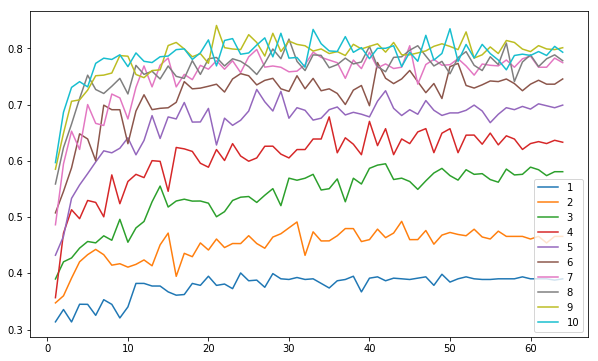

In [68]:
#https://stackoverflow.com/questions/18458734/python-plot-list-of-tuples
plt.figure(figsize=(10,6))
for depth in range(1, 11):
    plt.plot(*zip(*max_feat_acc[depth-1]), label=depth)
plt.legend()

In [69]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=10,
    max_depth=9
)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
cross_val_score(decision_tree, X_train, Y_train, cv=5).mean()

0.734970244375976

In [42]:
# baseline
Y_test.value_counts()/len(Y_test)

SalineControl       0.277778
MemantineControl    0.273148
MemantineTs65Dn     0.236111
SalineTs65Dn        0.212963
Name: Treated_Geno, dtype: float64

In [52]:
(decision_tree.predict(X_test) == Y_test).sum()/len(Y_test)

0.4305555555555556

In [29]:
decision_tree.predict(norm_features)

array(['MemantineTs65Dn', 'MemantineTs65Dn', 'MemantineTs65Dn', ...,
       'SalineTs65Dn', 'MemantineControl', 'MemantineControl'],
      dtype=object)

In [ ]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [78]:
rfc = ensemble.RandomForestClassifier()
scores = cross_val_score(rfc, X_train, Y_train, cv=5)

In [79]:
scores.mean()

0.9338198811650885

In [83]:
decision_tree.score(X_test, Y_test)

0.75

In [81]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
rfc.score(X_test, Y_test)

0.9722222222222222